In [5]:
from __future__ import print_function, division



import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline
import scipy.io as sio
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt

In [66]:
filename=input() #вводим название файла

30303MHG_Isat_09


In [67]:
spec=sio.loadmat(filename + '.mat') #считываем

In [68]:
spec #смотрим, как выглядит в питоне для понимания, что именно считывать

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Feb 16 18:51:18 2017',
 '__version__': '1.0',
 '__globals__': [],
 'sig': array([[-0.03967246],
        [-0.04821791],
        [-1.10297008],
        ...,
        [-0.03845168],
        [-0.0372309 ],
        [-0.03967246]]),
 'tb': array([[0.0000000e+00, 5.0000000e-07, 1.0000000e-06, ..., 5.9999995e+00,
         6.0000000e+00, 6.0000005e+00]])}

In [70]:
timename='tb'  #обозначаем, что хотим считывать
signame='sig'

In [71]:
fs=1/(spec[timename][0][1]-spec[timename][0][0])  # определяем частоту дискретизации
fs=round(fs)


2000000.0

In [74]:
sign=spec[signame].transpose()[0][int(2*fs):int(2.05*fs)]   # создаем опорный массив для времени от 2с до 2.05 мс

99999

In [76]:
corrarray=[]  #массив для корреляций
ofsets=np.arange(10000)  #массив для смещений

In [77]:
ofsets

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [78]:
signcomp=spec[signame].transpose()[0][int(2*fs)+1:int(2.05*fs)+1]

In [79]:
np.corrcoef(sign, signcomp)[1][0]

0.9802529583618664

In [80]:
corrarray=[]
for i in ofsets:
    signcomp=spec[signame].transpose()[0][int(2*fs)+i:int(2.05*fs)+i]
    corrarray.append(np.corrcoef(sign, signcomp)[1][0])

[1.0,
 0.9802529583618664,
 0.967178809985054,
 0.9457235051926213,
 0.922747485319907,
 0.886448561555701,
 0.8483094371094911,
 0.802684502187856,
 0.7565746203245257,
 0.7043590047823953,
 0.6490649357253284,
 0.5900425055292207,
 0.528714517716699,
 0.4670707384092671,
 0.40248535225654486,
 0.33811474104653033,
 0.2732623742379671,
 0.2122496910035384,
 0.15063129270652537,
 0.09192007483214817,
 0.034752116210506494,
 -0.018801198323531648,
 -0.07097764888836612,
 -0.1213207072600196,
 -0.16937915326748537,
 -0.21554668353431156,
 -0.2583837465128961,
 -0.30020023772340615,
 -0.33781150537647986,
 -0.3750872172007725,
 -0.4082883898193661,
 -0.440833994238714,
 -0.4683507855663859,
 -0.49550272855431743,
 -0.5190431427804428,
 -0.5420186209061614,
 -0.5616916026725663,
 -0.5802092265818963,
 -0.5954029771745319,
 -0.6071598062838938,
 -0.6169863177646251,
 -0.6226457223218249,
 -0.6258334065161208,
 -0.6240835228655445,
 -0.6211295910491049,
 -0.6124139258194756,
 -0.602135651916

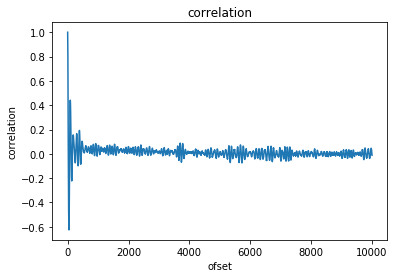

In [82]:
fig, ax =plt.subplots() #строим зависимость средних от времени
plt.title('correlation')
ax.plot(ofsets, corrarray)
plt.xlabel('ofset')
plt.ylabel('correlation')
plt.savefig(filename+'/correlation')
plt.show()